In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nobel = pd.read_csv('dataset/nobel.csv')
pd.options.mode.chained_assignment = None

In [3]:
nobel.head()

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


## Most Nobel Winner Countries

In [4]:
nobel_bron_country = nobel['born_country_code'].value_counts().to_frame()
nobel_bron_country = nobel_bron_country[nobel_bron_country['born_country_code'] >= 10]

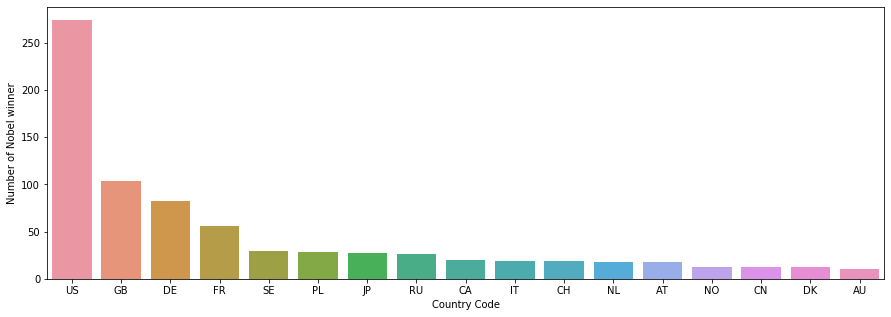

In [5]:
plt.figure(figsize=(15, 5))
sns.barplot(x = nobel_bron_country.index , y = 'born_country_code' ,data = nobel_bron_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winner')
plt.show()

**USA, Great Britain, Deutschland(Germany)** had the most wins in these years with remarkable distance

## Most Immigrants

In [6]:
imigrate_nobel_winner = nobel.loc[(nobel['born_country_code'] != nobel['died_country_code'])]
imigrate_nobel_winner.dropna(subset=['died_country_code'] , inplace=True)
print( str(len(imigrate_nobel_winner)) + ' Nobel winners that born country and died country are diffrent')
imigrate_nobel_winner_born_country = imigrate_nobel_winner['born_country_code'].value_counts().to_frame()
imigrate_nobel_winner_born_country = imigrate_nobel_winner_born_country[imigrate_nobel_winner_born_country['born_country_code'] >= 5]

190 Nobel winners that born country and died country are diffrent


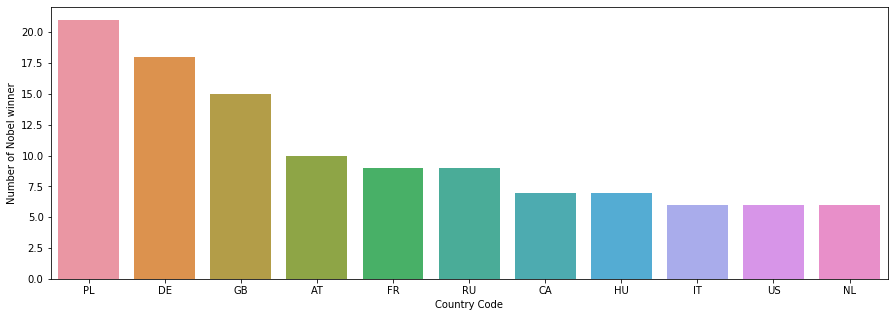

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(x = imigrate_nobel_winner_born_country.index , y = 'born_country_code' ,data = imigrate_nobel_winner_born_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winner')
plt.show()

**Poland, Deutschland(Germany) and Great Britain** had most immigrants that won Nobel prize.

## Countries with the highest number of immigrant admissions

In [8]:
imigrate_nobel_winner_died_country = imigrate_nobel_winner['died_country_code'].value_counts().to_frame()
imigrate_nobel_winner_died_country = imigrate_nobel_winner_died_country[imigrate_nobel_winner_died_country['died_country_code'] >= 5]

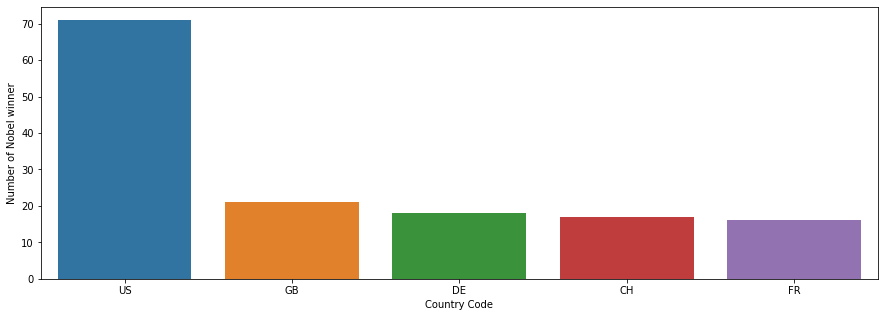

In [9]:
plt.figure(figsize=(15, 5))
sns.barplot(x = imigrate_nobel_winner_died_country.index , y = 'died_country_code' ,data = imigrate_nobel_winner_died_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winner')
plt.show()

As expected USA, Great Britain and Deutschland(Germany) had most immigrant admissions

## Immigrants that won Nobel Prize OR winners that Immigrants

In [10]:
imigrate_nobel_winner_gender = imigrate_nobel_winner['gender'].value_counts().to_frame()

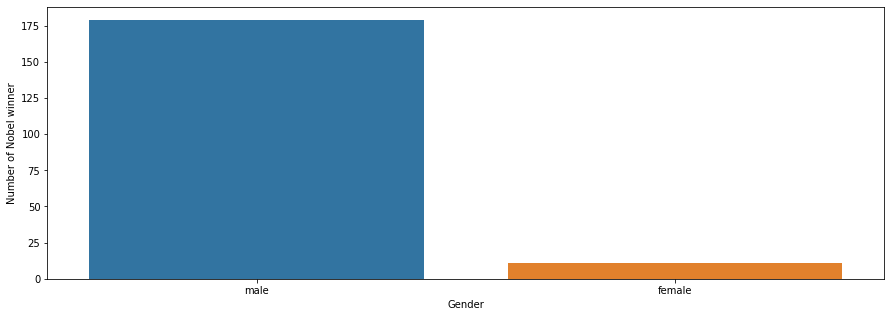

In [11]:
plt.figure(figsize=(15, 5))
sns.barplot(x = imigrate_nobel_winner_gender.index , y = 'gender' ,data = imigrate_nobel_winner_gender)
plt.xlabel('Gender')
plt.ylabel('Number of Nobel winner')
plt.show()

We don't have any information about winners that immigrates or when they won the prize then immigrates, this research population reveals us that they didn't die in homeland

## Ration of Winners

In [12]:
nobel_winner_gender = nobel['gender'].value_counts().to_frame()

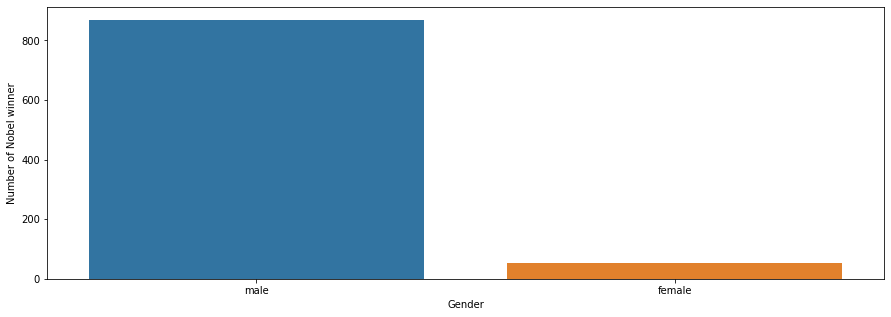

In [13]:
plt.figure(figsize=(15, 5))
sns.barplot(x = nobel_winner_gender.index , y = 'gender' ,data = nobel_winner_gender)
plt.xlabel('Gender')
plt.ylabel('Number of Nobel winner')
plt.show()

More than 850 Men won this prize and less than 100 Women won this prize

## Years that men's won more than 10 Prize and number of Prize per year

In [14]:
nobel_winner_year = nobel['year'].value_counts(ascending = True).to_frame()
nobel_winner_year = nobel_winner_year[nobel_winner_year['year'] >= 10]

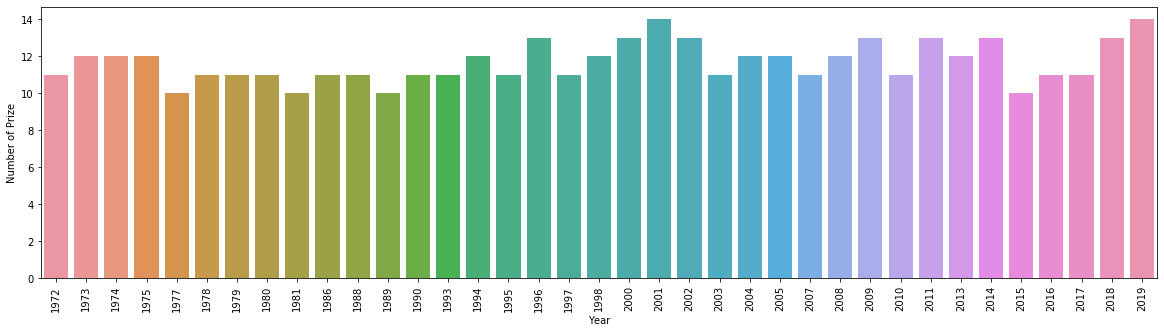

In [15]:
plt.figure(figsize=(20, 5))
sns.barplot(x = nobel_winner_year.index , y = 'year' ,data = nobel_winner_year)
plt.xlabel('Year')
plt.ylabel('Number of Prize')
plt.xticks(rotation = 90)
plt.show()

## Years that women's won more than One Prize and number of Prize per year

In [16]:
each_year_gender = nobel.groupby('year')['gender'].value_counts().to_frame()
each_year_gender.columns = ['number of winner']
each_year_gender.reset_index(inplace=True)
each_year_female = each_year_gender[(each_year_gender['gender'] == 'female') & (each_year_gender['number of winner'] >= 1 )]
each_year_male = each_year_gender[(each_year_gender['gender'] == 'male') & (each_year_gender['number of winner'] >= 10 )]

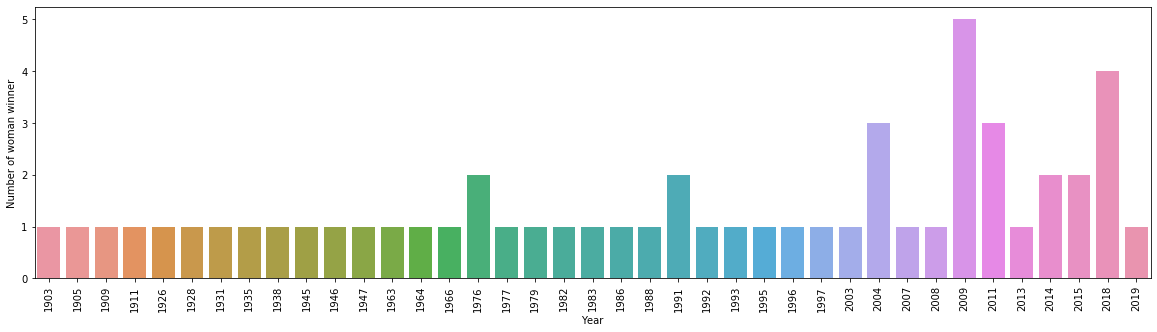

In [17]:
plt.figure(figsize=(20, 5))
sns.barplot(x = each_year_female.year , y = 'number of winner' ,data = each_year_female)
plt.xlabel('Year')
plt.ylabel('Number of woman winner')
plt.xticks(rotation = 90)
plt.show()

## Number of prize per category

In [18]:
winner_category = nobel['category'].value_counts().to_frame()

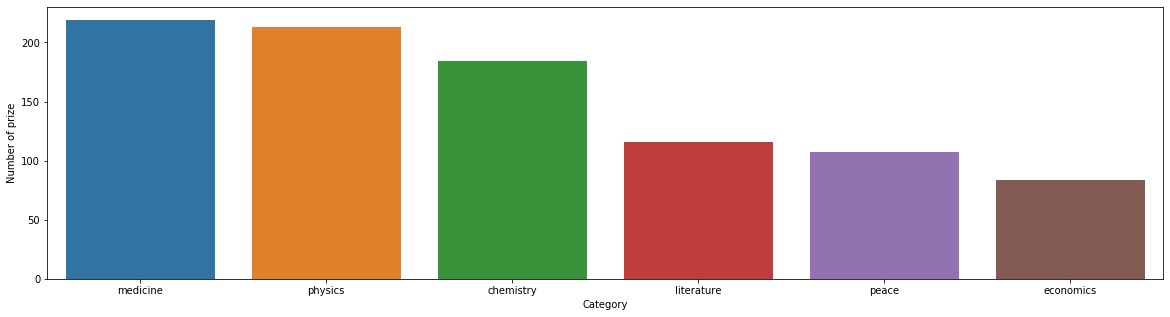

In [19]:
plt.figure(figsize=(20, 5))
sns.barplot(x = winner_category.index , y = 'category' ,data = winner_category)
plt.xlabel('Category')
plt.ylabel('Number of prize')
plt.show()

Medicine, Physics and Chemistry are fields with the highest number of prizes 

## Category By Gender

In [20]:
category_and_gender_winner = nobel.groupby('category')['gender'].value_counts().to_frame()
category_and_gender_winner.columns = ['number of winners']
category_and_gender_winner.reset_index(inplace=True)

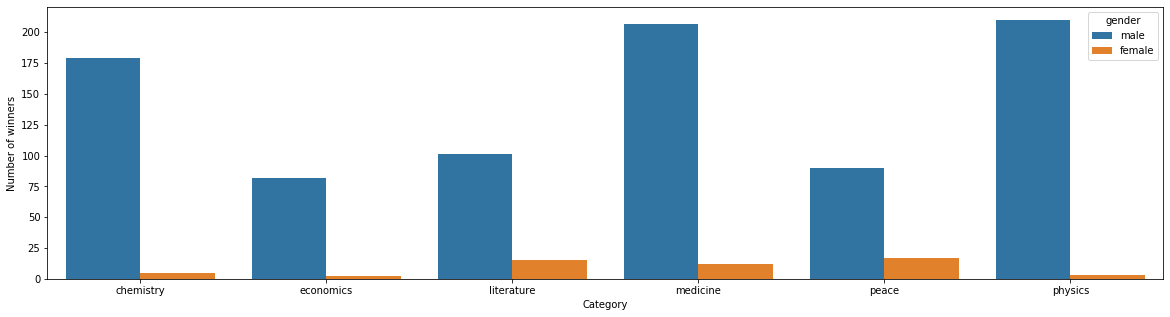

In [21]:
plt.figure(figsize=(20, 5))
sns.barplot(x = 'category' , y = 'number of winners' , hue = 'gender' ,data = category_and_gender_winner)
plt.xlabel('Category')
plt.ylabel('Number of winners')
plt.show()

Women's won most prizes in Peace, Literature, and Medicine but Men's in Physics, Medicine and Chemistry are favorite fields

## Top Universities that Nobel winners studied there

In [22]:
nobel_university_winner = nobel['name_of_university'].value_counts().to_frame()
nobel_university_winner = nobel_university_winner[nobel_university_winner['name_of_university'] >= 10]

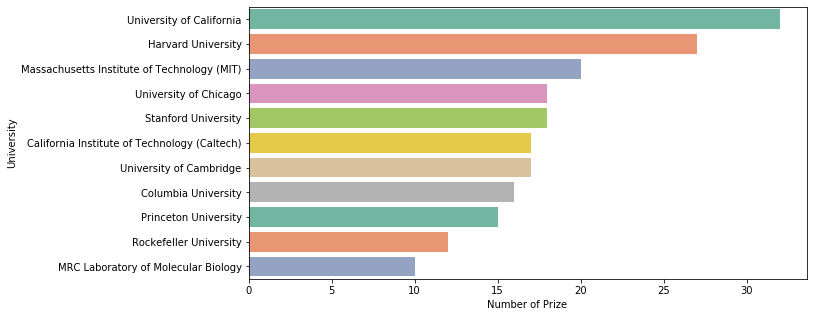

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(y = nobel_university_winner.index , x = 'name_of_university' ,data = nobel_university_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prize')
plt.ylabel('University')
plt.show()

University of California, Harvard University, and Massachusetts Institute of Technology (MIT) are top 3 Universities that Nobel winners studied there

## Top city of universities that Nobel winners studied there

In [24]:
nobel_city_winner = nobel['city_of_university'].value_counts().to_frame()
nobel_city_winner = nobel_city_winner[nobel_city_winner['city_of_university'] >= 10]

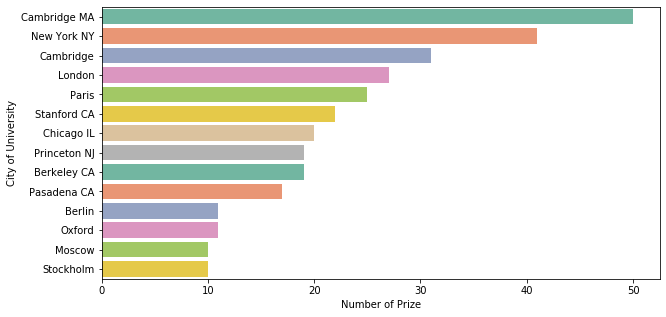

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(y = nobel_city_winner.index , x = 'city_of_university' ,data = nobel_city_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prize')
plt.ylabel('City of University')
plt.show()

Cambridge MA, New York, and Cambridge are top cities of universities that Nobel winners studied there

## Top Country of universities that Nobel winners studied there

In [26]:
nobel_country_winner = nobel['country_of_university'].value_counts().to_frame()
nobel_country_winner = nobel_country_winner[nobel_country_winner['country_of_university'] >= 5]

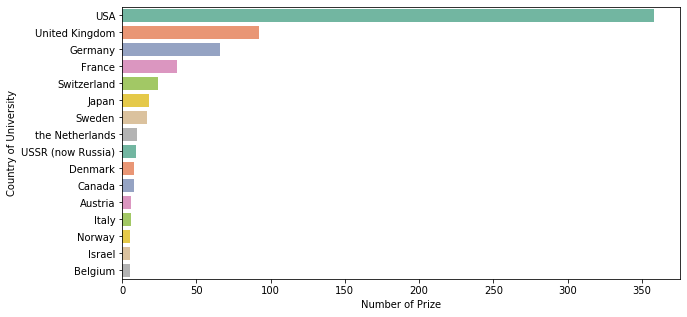

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(y = nobel_country_winner.index , x = 'country_of_university' ,data = nobel_country_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prize')
plt.ylabel('Country of University')
plt.show()

The USA United Kingdom and Germany are top Countries of universities that Nobel winners studied there

## Top Universities and distribution of category

In [28]:
fulprize_university = nobel[(nobel['name_of_university'] == 'University of California')
                          | (nobel['name_of_university'] == 'Harvard University')
                          | (nobel['name_of_university'] == 'Massachusetts Institute of Technology (MIT)')
                          | (nobel['name_of_university'] == 'Stanford University') 
                          | (nobel['name_of_university'] == 'University of Chicago')
                          | (nobel['name_of_university'] == 'University of Cambridge')
                          | (nobel['name_of_university'] == 'California Institute of Technology (Caltech)')
                          | (nobel['name_of_university'] == 'Columbia University')
                          | (nobel['name_of_university'] == 'Princeton University')
                          | (nobel['name_of_university'] == 'Rockefeller University')
                          | (nobel['name_of_university'] == 'MRC Laboratory of Molecular Biology')]
university_and_category = fulprize_university.groupby('name_of_university')['category'].value_counts().to_frame()
university_and_category.columns = ['number of prize']
university_and_category.reset_index(inplace= True)

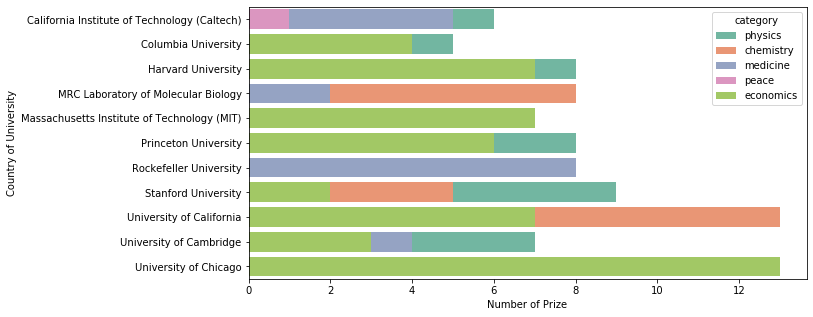

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(y = 'name_of_university' , x = 'number of prize' , hue = 'category' ,dodge = False ,data = university_and_category ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prize')
plt.ylabel('Country of University')
plt.show()

## Top Counties and distribution of category

In [30]:
nobel_country_winner_new = nobel_country_winner[nobel_country_winner['country_of_university'] >= 10]
fulprize_university_country = nobel[(nobel['country_of_university'] == 'USA')
                          | (nobel['country_of_university'] == 'United Kingdom')
                          | (nobel['country_of_university'] == 'Germany')
                          | (nobel['country_of_university'] == 'France') 
                          | (nobel['country_of_university'] == 'Switzerland')
                          | (nobel['country_of_university'] == 'Japan')
                          | (nobel['country_of_university'] == 'Sweden')
                          | (nobel['country_of_university'] == 'the Netherlands')]
country_university_and_category = fulprize_university_country.groupby('country_of_university')['category'].value_counts().to_frame()
country_university_and_category.columns = ['Number of Prize']
country_university_and_category.reset_index(inplace=True)

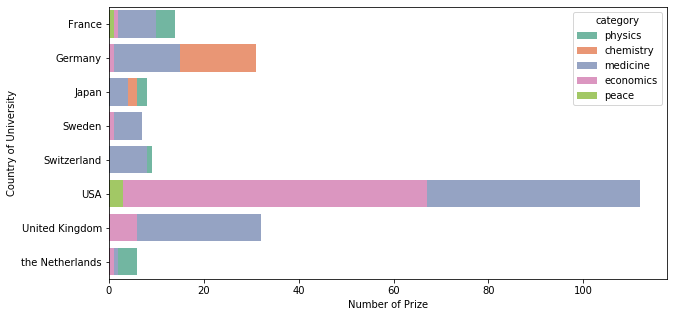

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(y = 'country_of_university' , x = 'Number of Prize' , hue = 'category' ,dodge = False ,data = country_university_and_category ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prize')
plt.ylabel('Country of University')
plt.show()

## Distribution of winners per Months

In [32]:
born_month_winner = nobel['born_month'].value_counts().to_frame()

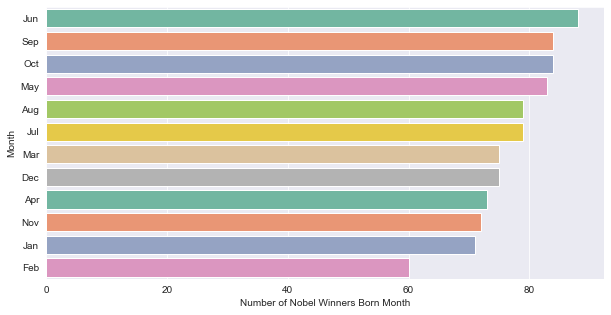

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(y = born_month_winner.index , x = 'born_month' ,data = born_month_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Nobel Winners Born Month')
plt.ylabel('Month')
plt.show()

## Distribution of Age Winners

In [34]:
print(str(nobel['age'].mean()) + ' is average of age in all of Nobel winners from 1901 untill now.')

79.34669555796316 is average of age in all of Nobel winners from 1901 untill now.


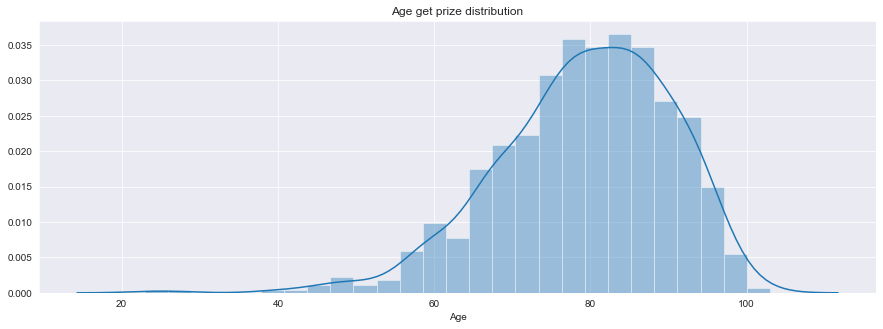

In [35]:
plt.figure(figsize=(15, 5))
sns.distplot(nobel['age'])
plt.xlabel('Age')
plt.title('Age get prize distribution')
plt.show()

## Distribution of Age Winners when they Won prize 

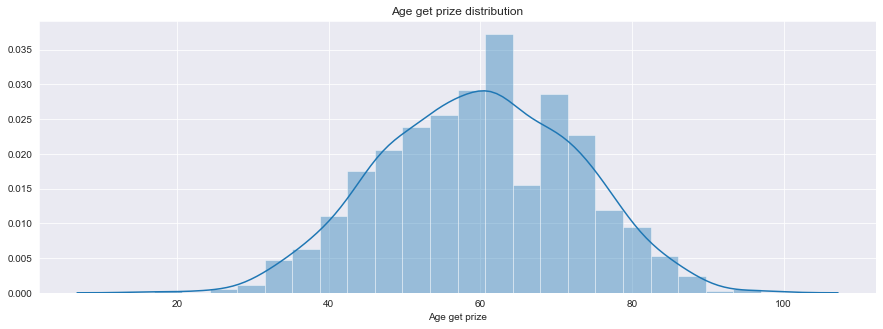

In [36]:
plt.figure(figsize=(15, 5))
sns.distplot(nobel['age_get_prize'])
plt.xlabel('Age get prize')
plt.title('Age get prize distribution')
plt.show()

## Distribution of Age Winners VS Age of winners when get prize

<Figure size 1080x360 with 0 Axes>

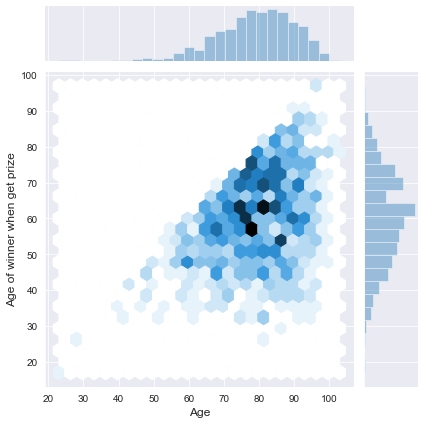

In [37]:
plt.figure(figsize=(15, 5))
plot = sns.jointplot(x='age', y='age_get_prize' , kind='hex' ,data=nobel)
plot.set_axis_labels('x', 'y', fontsize=12)
plot.ax_joint.set_xlabel('Age')
plot.ax_joint.set_ylabel('Age of winner when get prize')
plt.tight_layout()

As you see the distribution of Age are normal but skewed to left and distribution of Age when the get prize is normal, A glance reveals us that they have positive relationship and correlation

## Average age seprated by gender

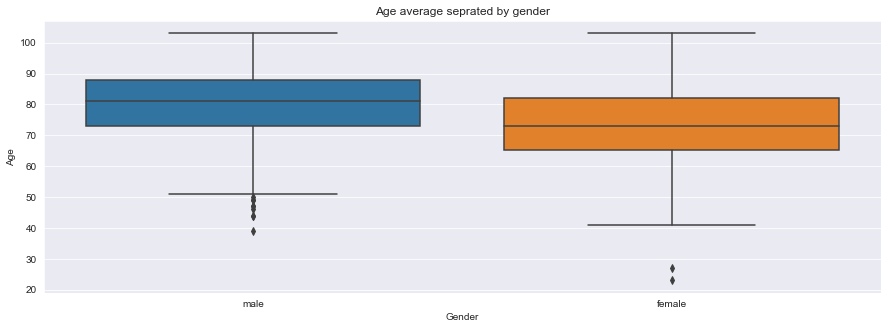

In [38]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='gender', y='age', data=nobel)
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Age average seprated by gender')
plt.show()

Men's mean of ages is about 81 years and Women's mean is about 73 

## Age of winners per category

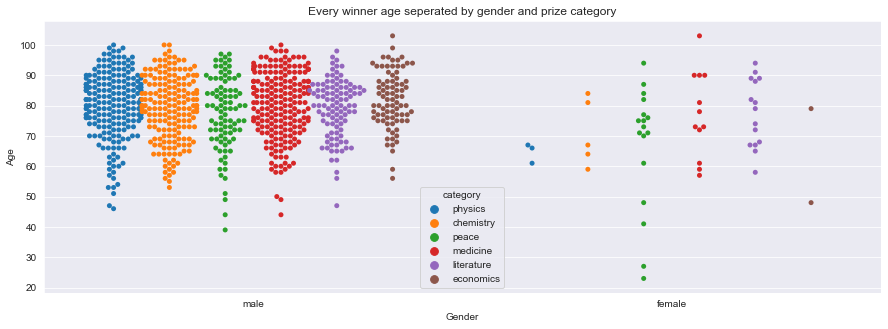

In [39]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x='gender', y='age',hue = 'category', dodge=True , data=nobel)
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Every winner age seperated by gender and prize category')
plt.show()

## Average age when they get Prize seprated by gender

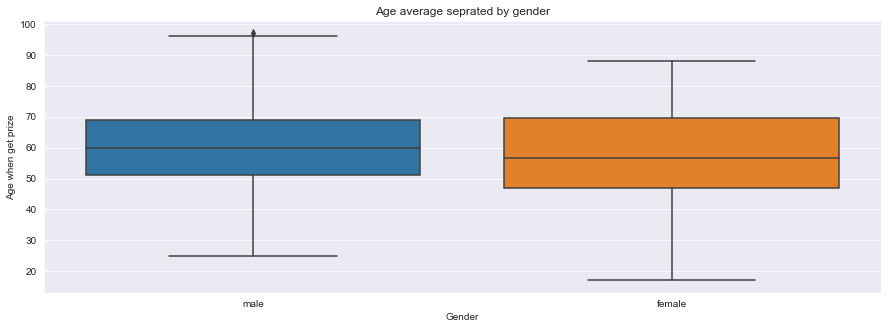

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='gender', y='age_get_prize', data=nobel)
plt.ylabel('Age when get prize')
plt.xlabel('Gender')
plt.title('Age average seprated by gender')
plt.show()

It's similar to the mean of ages bus distance between the mean of Men's and Women's when they get prize proportional of ages is less  

## Age of winners when they get Prize per category

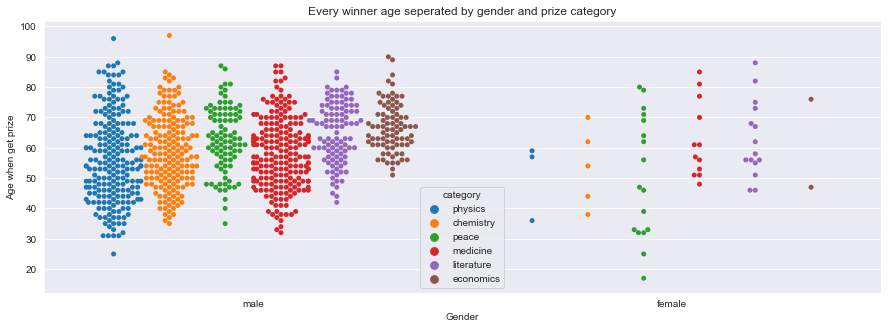

In [41]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x='gender', y='age_get_prize',hue = 'category', dodge=True , data=nobel)
plt.ylabel('Age when get prize')
plt.xlabel('Gender')
plt.title('Every winner age seperated by gender and prize category')
plt.show()

## Kernel density estimation of Men's age and age when they get prize

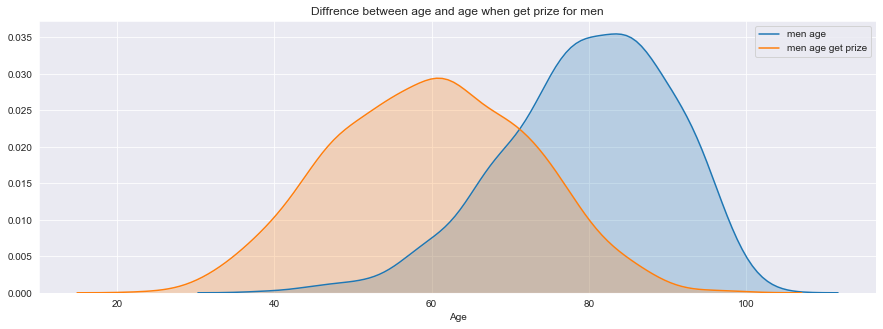

In [42]:
plt.figure(figsize=(15, 5))
sns.kdeplot(nobel.age[nobel.gender=='male'], label='men age', shade=True)
sns.kdeplot(nobel.age_get_prize[nobel.gender=='male'], label='men age get prize', shade=True)
plt.xlabel('Age')
plt.title('Diffrence between age and age when get prize for men')
plt.show()

## Kernel density estimation of Women's age and age when they get prize

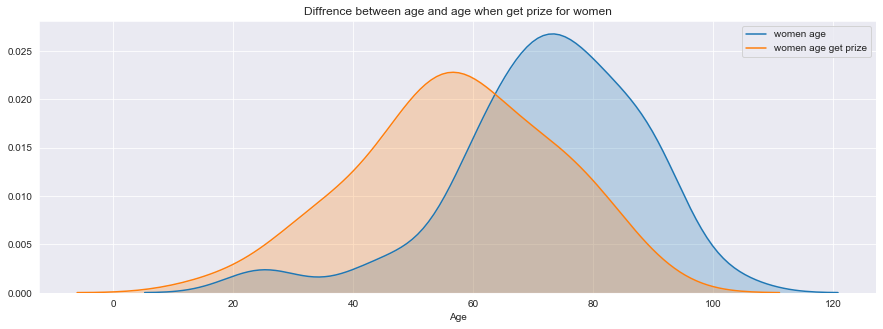

In [43]:
plt.figure(figsize=(15, 5))
sns.kdeplot(nobel.age[nobel.gender=='female'], label='women age', shade=True)
sns.kdeplot(nobel.age_get_prize[nobel.gender=='female'], label='women age get prize', shade=True)
plt.xlabel('Age')
plt.title('Diffrence between age and age when get prize for women')
plt.show()

## Kernel density estimation of age per category

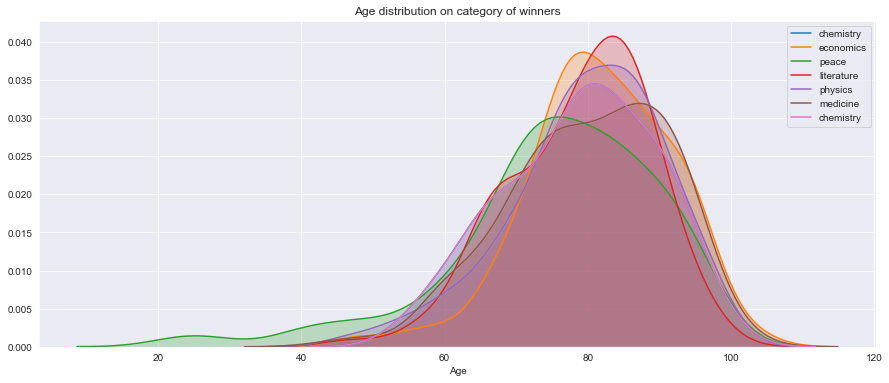

In [44]:
plt.figure(figsize=(15, 6))
sns.kdeplot(nobel.age[nobel.category == 'chemistry'], label='chemistry', shade=True)
sns.kdeplot(nobel.age[nobel.category == 'economics'], label='economics', shade=True)
sns.kdeplot(nobel.age[nobel.category == 'peace'], label='peace', shade=True)
sns.kdeplot(nobel.age[nobel.category == 'literature'], label='literature', shade=True)
sns.kdeplot(nobel.age[nobel.category == 'physics'], label='physics', shade=True)
sns.kdeplot(nobel.age[nobel.category == 'medicine'], label='medicine', shade=True)
sns.kdeplot(nobel.age[nobel.category == 'chemistry'], label='chemistry', shade=True)
plt.xlabel('Age')
plt.title('Age distribution on category of winners')
plt.show()

## Kernel density estimation of Men's age and age when they get prize

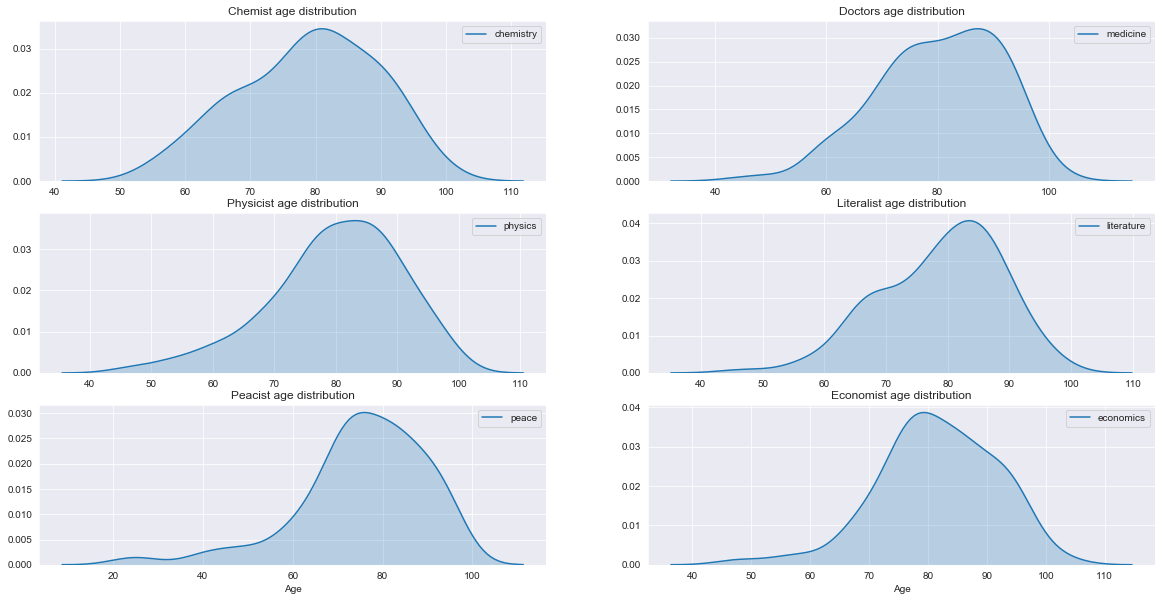

In [45]:
plt.figure(figsize=(20, 10))

plt.subplot(321)
sns.kdeplot(nobel.age[nobel.category == 'chemistry'], label='chemistry', shade=True)

plt.title('Chemist age distribution')

plt.subplot(322)
sns.kdeplot(nobel.age[nobel.category == 'medicine'], label='medicine', shade=True)

plt.title('Doctors age distribution')

plt.subplot(323)
sns.kdeplot(nobel.age[nobel.category == 'physics'], label='physics', shade=True)

plt.title('Physicist age distribution')

plt.subplot(324)
sns.kdeplot(nobel.age[nobel.category == 'literature'], label='literature', shade=True)

plt.title('Literalist age distribution')


plt.subplot(325)
sns.kdeplot(nobel.age[nobel.category == 'peace'], label='peace', shade=True)
plt.xlabel('Age')
plt.title('Peacist age distribution')

plt.subplot(326)
sns.kdeplot(nobel.age[nobel.category == 'economics'], label='economics', shade=True)
plt.xlabel('Age')
plt.title('Economist age distribution')
plt.show()

## Who win the prize more than one time and gender variety

In [46]:
who_won_more_than_one = nobel[nobel.duplicated(subset=['firstname','surname'], keep= False)]\
[["firstname","surname","year", "age_get_prize", "gender","born_country_code", "died_country_code"]].reset_index()
who_won_more_than_one["difference_between_two_prize"] = who_won_more_than_one.groupby("surname")["year"].diff().abs()
who_won_more_than_one.bfill()

,index,firstname,surname,year,age_get_prize,gender,born_country_code,died_country_code,difference_between_two_prize
0,5,Marie,Curie,1903,36,female,PL,FR,8.0
1,6,Marie,Curie,1911,44,female,PL,FR,8.0
2,65,John,Bardeen,1956,48,male,US,US,16.0
3,66,John,Bardeen,1972,64,male,US,US,16.0
4,214,Linus,Pauling,1962,61,male,US,US,8.0
5,215,Linus,Pauling,1954,53,male,US,US,8.0
6,220,Frederick,Sanger,1958,40,male,GB,GB,22.0
7,221,Frederick,Sanger,1980,62,male,GB,GB,22.0


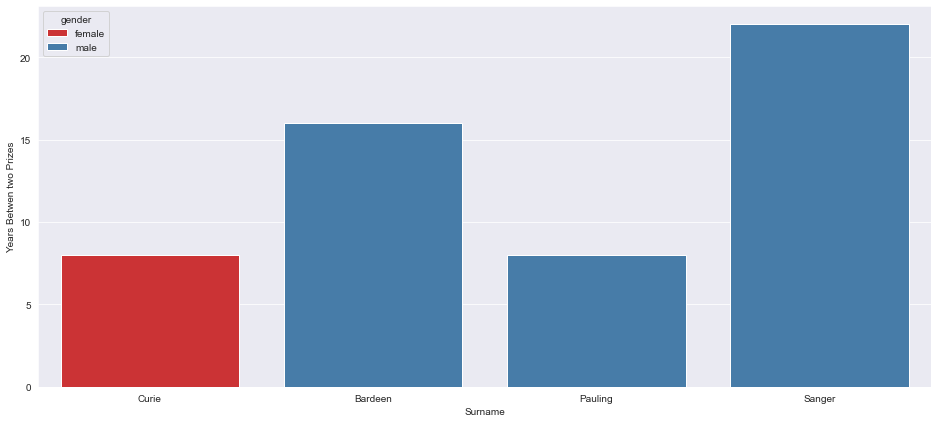

In [47]:
plt.figure(figsize = (16, 7))
sns.barplot(x= "surname", y= "difference_between_two_prize", hue= "gender",
            dodge=False, data= who_won_more_than_one, palette="Set1")
plt.xlabel("Surname")
plt.ylabel("Years Betwen two Prizes")
plt.show()